In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# PROJECT OPTION 1

----

## Content

The data here are taken from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates. The full datasets and much more can be found at the American Factfinder website.

1. acs2015_census_tract_data.csv: Data for each census tract in the US, including DC and Puerto Rico.
2. acs2015_county_data.csv: Data for each county or county equivalent in the US, including DC and Puerto Rico.

The two files have the same structure, with just a small difference in the name of the id column. Counties are political subdivisions, and the boundaries of some have been set for centuries. Census tracts, however, are defined by the census bureau and will have a much more consistent size. A typical census tract has around 5000 or so residents.

The Census Bureau updates the estimates approximately every year. At least some of the 2016 data is already available, so I will likely update this in the near future.

## Acknowledgements

The data here were collected by the US Census Bureau.

## Inspiration

There are many questions that we could try to answer with the data here:
1. Can we predict things such as the state (classification) or household income (regression)? 
2. What kinds of clusters can we find in the data? 


In [2]:
df = pd.read_csv('./us-census-demographic-data/acs2015_census_tract_data.csv')

In [3]:
df.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [4]:
df.dtypes

CensusTract          int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap       float64
IncomePerCapErr    float64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

In [6]:
df.describe(include='all')

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001,74001,74001.000000,74001.000000,74001.000000,73311.000000,73311.000000,73311.000000,73311.000000,...,73204.000000,73204.000000,73204.000000,73052.000000,74001.000000,73194.000000,73194.000000,73194.000000,73194.000000,73199.000000
unique,NaN,52,1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,California,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8057,2346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.839113e+10,NaN,NaN,4325.591465,2127.648816,2197.942649,16.862810,62.032106,13.272581,0.727726,...,3.123340,1.891606,4.368093,25.667357,1983.907366,78.975238,14.621566,6.233814,0.169772,9.028663
std,1.647593e+10,NaN,NaN,2129.306903,1072.332031,1095.730931,22.940695,30.684152,21.762483,4.488340,...,5.881237,2.596198,3.904990,6.964881,1073.429808,8.345758,7.535786,4.042990,0.458227,5.955441
min,1.001020e+09,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,NaN,NaN,2891.000000,1409.000000,1461.000000,2.400000,39.400000,0.700000,0.000000,...,0.400000,0.400000,1.800000,20.800000,1249.000000,74.600000,9.600000,3.500000,0.000000,5.100000
50%,2.804700e+10,NaN,NaN,4063.000000,1986.000000,2066.000000,7.000000,71.400000,3.700000,0.000000,...,1.400000,1.100000,3.500000,25.000000,1846.000000,80.100000,13.400000,5.500000,0.000000,7.700000
75%,4.200341e+10,NaN,NaN,5442.000000,2674.000000,2774.000000,20.400000,88.300000,14.400000,0.400000,...,3.500000,2.500000,5.900000,29.800000,2553.000000,84.600000,18.200000,8.100000,0.000000,11.400000


In [7]:
df.isnull().sum()

CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

In [9]:
census = df.dropna(axis=0)
census.isnull().sum()

CensusTract        0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [10]:
census.shape

(72727, 37)

In [13]:
#To drop any columns that contain nothing but empty values
census = census.dropna(axis=1, how='all')
census.shape


(72727, 37)

In [15]:
# All values as a NumPy array
census.values

array([[1001020100, 'Alabama', 'Autauga', ..., 4.6, 0.0, 5.4],
       [1001020200, 'Alabama', 'Autauga', ..., 6.1, 0.0, 13.3],
       [1001020300, 'Alabama', 'Autauga', ..., 12.3, 0.0, 6.2],
       ...,
       [72153750503, 'Puerto Rico', 'Yauco', ..., 9.5, 0.0, 23.3],
       [72153750601, 'Puerto Rico', 'Yauco', ..., 1.3, 0.0, 26.7],
       [72153750602, 'Puerto Rico', 'Yauco', ..., 7.7, 0.0, 20.1]],
      dtype=object)

In [18]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72727 entries, 0 to 74000
Data columns (total 37 columns):
CensusTract        72727 non-null int64
State              72727 non-null object
County             72727 non-null object
TotalPop           72727 non-null int64
Men                72727 non-null int64
Women              72727 non-null int64
Hispanic           72727 non-null float64
White              72727 non-null float64
Black              72727 non-null float64
Native             72727 non-null float64
Asian              72727 non-null float64
Pacific            72727 non-null float64
Citizen            72727 non-null int64
Income             72727 non-null float64
IncomeErr          72727 non-null float64
IncomePerCap       72727 non-null float64
IncomePerCapErr    72727 non-null float64
Poverty            72727 non-null float64
ChildPoverty       72727 non-null float64
Professional       72727 non-null float64
Service            72727 non-null float64
Office             72

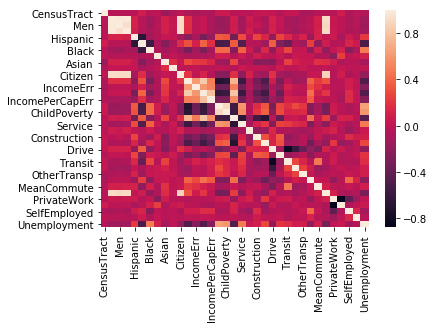

In [16]:
sns.heatmap(census.corr())

248750.0


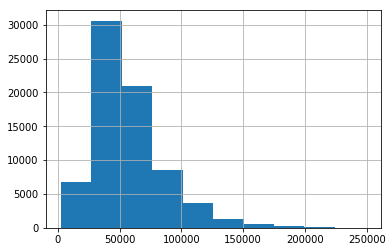

In [30]:
print(census.Income.max())
census.Income.hist()

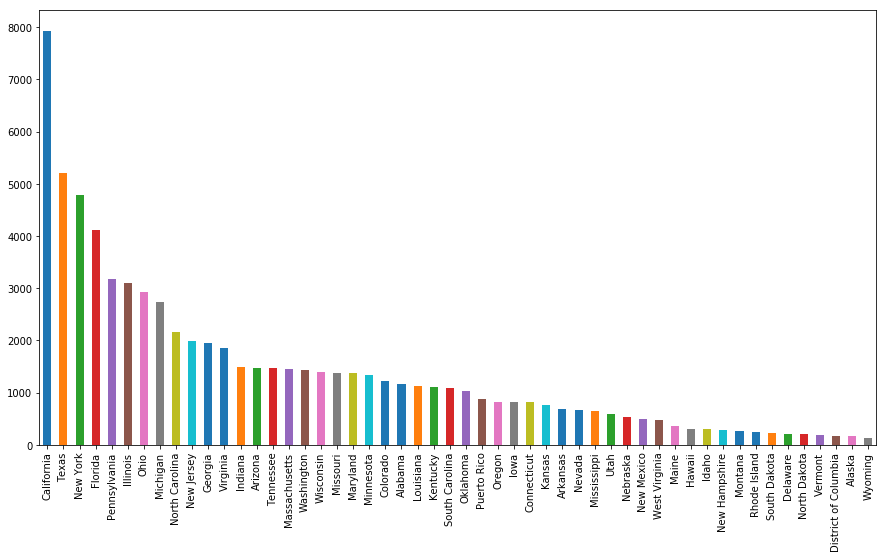

In [43]:
census.State.value_counts().plot(kind='bar',figsize=(15,8))

In [37]:
census.County.value_counts()

Los Angeles               2301
Cook                      1319
Orange                     930
Jefferson                  912
Maricopa                   881
Montgomery                 824
Harris                     786
Kings                      773
Wayne                      756
Clark                      687
Queens                     640
San Diego                  620
Dallas                     560
Washington                 555
Middlesex                  532
Suffolk                    513
Miami-Dade                 505
Franklin                   491
Marion                     453
Riverside                  445
Cuyahoga                   441
Jackson                    428
Lake                       420
King                       397
Allegheny                  389
Essex                      387
Hillsborough               387
Monroe                     381
Philadelphia               373
Santa Clara                372
                          ... 
Stanley                      1
Jerauld 

# PROJECT OPTION 2


## Context
----

The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as braking and gear changes. The datasets' positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts.

## Content
----

The training set contains 60000 examples in total in which 59000 belong to the negative class and 1000 positive class. The test set contains 16000 examples. There are 171 attributes per record.

The attribute names of the data have been anonymized for proprietary reasons. It consists of both single numerical counters and histograms consisting of bins with different conditions. Typically the histograms have open-ended conditions at each end. For example, if we measuring the ambient temperature "T" then the histogram could be defined with 4 bins where:

The attributes are as follows: class, then anonymized operational data. The operational data have an identifier and a bin id, like "Identifier_Bin". In total there are 171 attributes, of which 7 are histogram variables. Missing values are denoted by "na".

## Acknowledgements
----

This file is part of APS Failure and Operational Data for Scania Trucks. It was imported from the UCI ML Repository.

## Inspiration
----

The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnecessary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown. Cost_1 = 10 and Cost_2 = 500, and Total_cost = Cost_1*No_Instances + Cost_2*No_Instances.

## Goal

Create a model which accurately predicts and minimizes [the cost of] failures?

In [22]:
df2 = pd.read_csv('./aps-failure-at-scania-trucks-data-set/aps_failure_training_set_processed_8bit.csv')

In [23]:
print(df2.shape)
df2.head()

(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.992188,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.992188,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.023438,-0.062500,-0.132812,-0.132812,-0.187500,-0.148438,-0.085938,-0.140625,-0.023438,-0.023438
2,-0.992188,-0.125000,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,-0.140625,-0.093750,-0.015625,0.015625,-0.007812,-0.109375,-0.093750,-0.164062,-0.023438,-0.023438
3,-0.992188,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.007812,-0.007812,-0.03125,-0.054688,...,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,0.890625,0.992188
4,-0.992188,0.007812,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,...,0.156250,0.031250,-0.031250,-0.039062,-0.046875,-0.015625,0.656250,-0.148438,-0.023438,-0.023438


In [24]:
df2.dtypes

class     float64
aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
af_000    float64
ag_000    float64
ag_001    float64
ag_002    float64
ag_003    float64
ag_004    float64
ag_005    float64
ag_006    float64
ag_007    float64
ag_008    float64
ag_009    float64
ah_000    float64
ai_000    float64
aj_000    float64
ak_000    float64
al_000    float64
am_0      float64
an_000    float64
ao_000    float64
ap_000    float64
aq_000    float64
ar_000    float64
as_000    float64
at_000    float64
           ...   
dl_000    float64
dm_000    float64
dn_000    float64
do_000    float64
dp_000    float64
dq_000    float64
dr_000    float64
ds_000    float64
dt_000    float64
du_000    float64
dv_000    float64
dx_000    float64
dy_000    float64
dz_000    float64
ea_000    float64
eb_000    float64
ec_00     float64
ed_000    float64
ee_000    float64
ee_001    float64
ee_002    float64
ee_003    float64
ee_004    float64
ee_005    float64
ee_006    

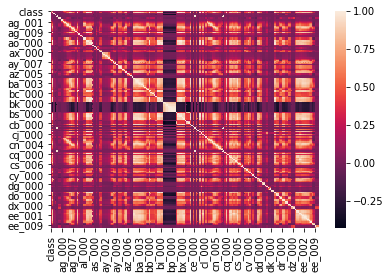

In [25]:
sns.heatmap(df2.corr())

In [12]:
df3 = pd.read_csv('./aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv')
print(df3.shape)
df3.head()

(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
